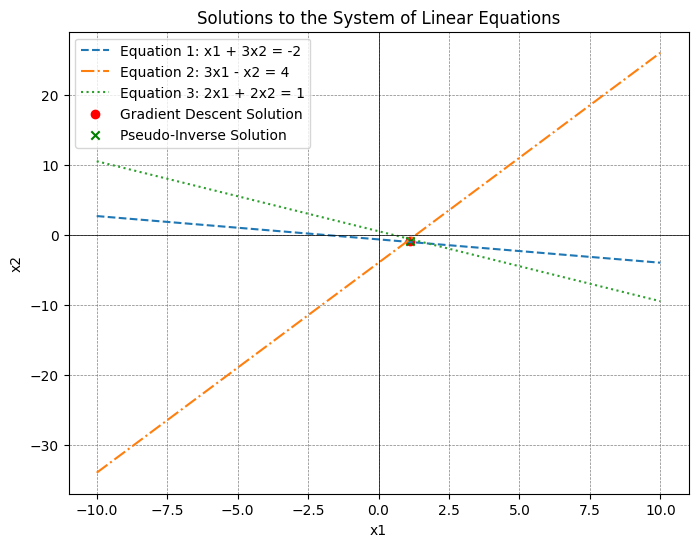

x1 (Pseudo-Inverse) = 1.111111
x2 (Pseudo-Inverse) = -0.888889
x1 (Gradient Descent) = 1.111111
x2 (Gradient Descent) = -0.888889
Explaination is in the word document...


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Algorithem has been used for the minimization of E value
def gradient_descent(x, f, grad_f, alpha, epsilon, max_iterations=10000):

    for iteration in range(max_iterations):
        gradient = grad_f(x)
        if np.linalg.norm(gradient) < epsilon:
            return x  # Converged to a minimum
        x -= alpha * gradient
    raise Exception("Gradient descent did not converge within the maximum iterations.")

# Here we get the sum of the squared residual errors
def sse_equations(x):

    x1, x2 = x
    r1 = x1 + 3 * x2 + 2
    r2 = 3 * x1 - x2 - 4
    r3 = 2 * x1 + 2 * x2 - 1
    return r1**2 + r2**2 + r3**2

# gradient of sum of squared residual errors for equation
def gradient_sse_equations(x):

    x1, x2 = x
    grad = np.zeros(2)
    grad[0] = 2 * (x1 + 3 * x2 + 2) + 6 * (3 * x1 - x2 - 4) + 4 * (2 * x1 + 2 * x2 - 1)
    grad[1] = 6 * (x1 + 3 * x2 + 2) - 2 * (3 * x1 - x2 - 4) + 4 * (2 * x1 + 2 * x2 - 1)
    return grad

# intitialize the value of x1 and x2 for gradial descent
initial_values = np.array([0.0, 0.0])

# learning rate and tolerance given
learning_rate = 0.01
convergence_tolerance = 1e-6

# optimizing the SSE
optimal_values_gradient_descent = gradient_descent(initial_values, sse_equations, gradient_sse_equations, learning_rate, convergence_tolerance)

# Define the coefficient matrix A and vector b for the over-determined system of equations.
A = np.array([[1, 3], [3, -1], [2, 2]])
b = np.array([-2, 4, 1])

# gets the pseudo-inverse of A
A_inv = np.linalg.pinv(A)

# solve the system of linear equations using the pseudo-inverse.
solution_pseudo_inverse = A_inv @ b

def equation1(x1):
    return (-2 - x1) / 3

def equation2(x1):
    return 3 * x1 - 4

def equation3(x1):
    return (1 - 2 * x1) / 2

x1_values = np.linspace(-10, 10, 100)

x2_values_eq1 = equation1(x1_values)
x2_values_eq2 = equation2(x1_values)
x2_values_eq3 = equation3(x1_values)

# Plot the equations.
plt.figure(figsize=(8, 6))
plt.plot(x1_values, x2_values_eq1, label='Equation 1: x1 + 3x2 = -2', linestyle='--')
plt.plot(x1_values, x2_values_eq2, label='Equation 2: 3x1 - x2 = 4', linestyle='-.')
plt.plot(x1_values, x2_values_eq3, label='Equation 3: 2x1 + 2x2 = 1', linestyle=':')

# Plot the solution obtained from gradient descent.
plt.scatter(optimal_values_gradient_descent[0], optimal_values_gradient_descent[1], color='red', marker='o', label='Gradient Descent Solution')

# Plot the solution obtained using the pseudo-inverse.
plt.scatter(solution_pseudo_inverse[0], solution_pseudo_inverse[1], color='green', marker='x', label='Pseudo-Inverse Solution')

plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Solutions to the System of Linear Equations')
plt.show()

print('x1 (Pseudo-Inverse) = {:.6f}'.format(solution_pseudo_inverse[0]))
print('x2 (Pseudo-Inverse) = {:.6f}'.format(solution_pseudo_inverse[1]))

print('x1 (Gradient Descent) = {:.6f}'.format(optimal_values_gradient_descent[0]))
print('x2 (Gradient Descent) = {:.6f}'.format(optimal_values_gradient_descent[1]))

print('Explaination is in the word document...')
